In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from msc_project.utils import data_utils as du
plt.style.use('ggplot')

In [54]:
def plot_comparison(csv_path_learn, csv_path_no_learn, **kwargs):
    data_learn = pd.read_csv(csv_path_learn)
    data_nolearn = pd.read_csv(csv_path_no_learn)

    data_learn.sort_values(by=['device_id', 'test_time'], inplace=True)
    data_nolearn.sort_values(by=['device_id', 'test_time'], inplace=True)
    
    fig, ax = plt.subplots(figsize=(15, 6))
    
    ax.scatter(data_learn['device_id'], data_learn['val_acc'], label='With learning', marker='o')
    ax.scatter(data_nolearn['device_id'], data_nolearn['val_acc'], label='Without learning', marker='x')

    ax.set_xticks(data_learn['device_id'].unique())
    ax.set_xticklabels(data_learn['device_id'].unique(), rotation=30, ha='right')

    ax.set(**kwargs)
    ax.legend()

    plt.show()


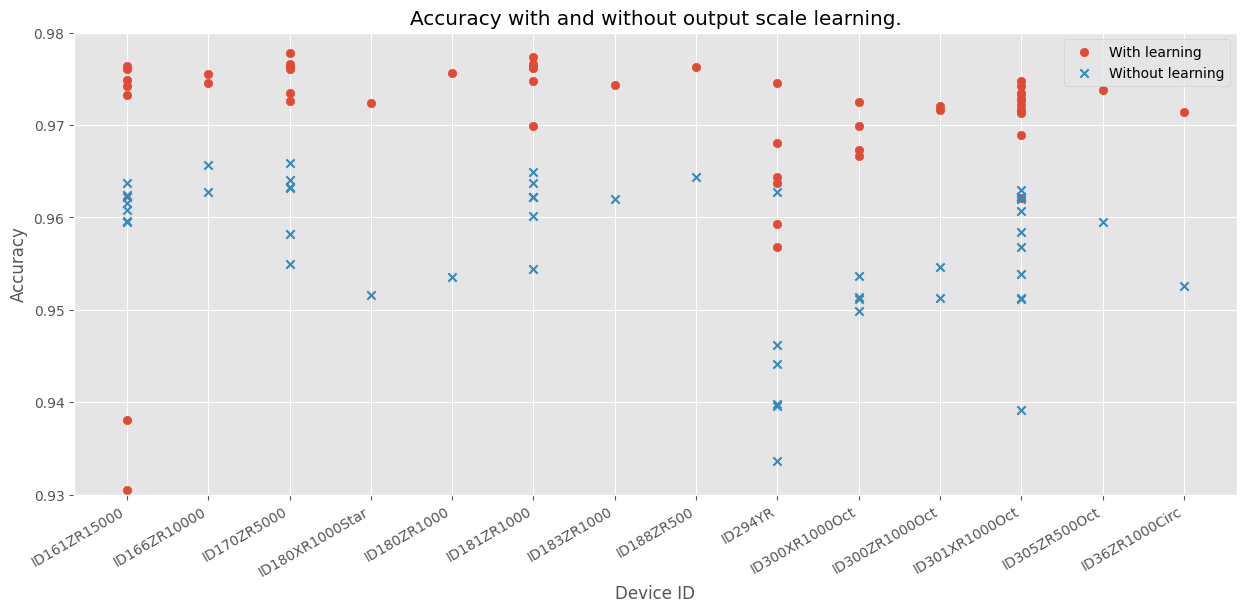

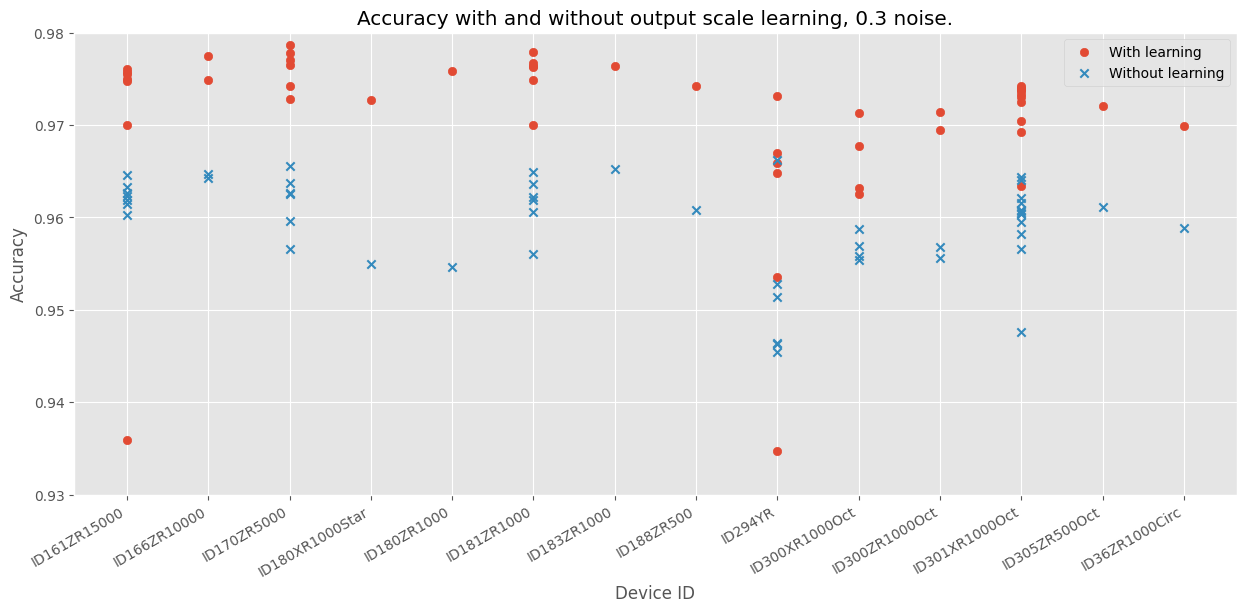

In [65]:
ROOT_DIR = '/scratch/msc24h18/msc_project/results/test32'

DATA_PATH_LEARN = os.path.join(ROOT_DIR, 'learn_out_scaling_wnstd_0.csv')
DATA_PATH_LEARN_NOISE = os.path.join(ROOT_DIR, 'learn_out_scaling_wnstd_0.3.csv')

DATA_PATH_NOLEARN = os.path.join(ROOT_DIR, 'no_out_scaling_wnstd_0.csv')
DATA_PATH_NOLEARN_NOISE = os.path.join(ROOT_DIR, 'no_out_scaling_wnstd_0.3.csv')

plot_comparison(DATA_PATH_LEARN, DATA_PATH_NOLEARN, title="Accuracy with and without output scale learning.", xlabel='Device ID', ylabel='Accuracy', ylim=(0.93, 0.98))
plot_comparison(DATA_PATH_LEARN_NOISE, DATA_PATH_NOLEARN_NOISE, title="Accuracy with and without output scale learning, 0.3 noise.", xlabel='Device ID', ylabel='Accuracy', ylim=(0.93, 0.98))